### Przbliżamy wartość równaniem:

\begin{align*}
\hat y = \frac{1}{1 + e^{-z}}
\end{align*}

\begin{align*}
z = wx + b
\end{align*}

\begin{align*}
w = w - \alpha * dw
\end{align*}
\begin{align*}
b = b - \alpha * db
\end{align*}

### Czym jest dw i db?

\begin{align*}
\alpha = krok
\end{align*}

\begin{align*}
dw = \frac{dJ}{dw} = \frac{1}{N} \sum x_{i}(\hat y_{i}-y_{i})
\end{align*}

\begin{align*}
db = \frac{dJ}{db} = \frac{1}{N} \sum (\hat y_{i} - y_{i})
\end{align*}

### Funkcja kosztu

\begin{align*}
J(w,b) = \frac{1}{N} \sum_{i=1}^{n} \left[y_{i} log(\hat y_{i}) + (1-y_{i})log(1- \hat y_{i})\right]
\end{align*}

In [58]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1

<div>
<img src="http://chemmaks.pl/Tutoriale/Cechy.png" width="700"/>
</div>


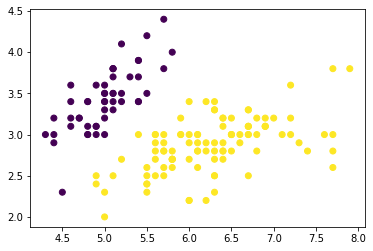

In [59]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1], c = y)

## Sigmoid

In [60]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

\begin{align*}
z = wx + b
\end{align*}

\begin{align*}
\hat y = \frac{1}{1 + e^{-z}}
\end{align*}

<div>
<img src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="300"/>
</div>

## Funkcja kosztu

\begin{align*}
J(w,b) = \frac{1}{N} \sum_{i=1}^{n} \left[y_{i} log(\hat y_{i}) + (1-y_{i})log(1- \hat y_{i})\right]
\end{align*}

In [61]:
def koszt(pred, y):
    return (-y * np.log(pred) - (1 - y) * np.log(1 - pred)).mean()

### Czym jest dw i db?

\begin{align*}
w = w - \alpha * dw
\end{align*}
\begin{align*}
b = b - \alpha * db
\end{align*}

\begin{align*}
\alpha = krok
\end{align*}

\begin{align*}
dw = \frac{dJ}{dw} = \frac{1}{N} \sum x_{i}(\hat y_{i}-y_{i})
\end{align*}

\begin{align*}
db = \frac{dJ}{db} = \frac{1}{N} \sum (\hat y_{i} - y_{i})
\end{align*}

In [62]:
def spadek_gradientu(x, y, lr, iteracje):
    liczba_cech = x.shape[1]
    bias = 0
    wagi = np.zeros(liczba_cech)
    
    for n in range(iteracje):
        Z = np.dot(wagi, np.transpose(x)) + bias
        prawdopodobienstwa_klas = sigmoid(Z)
        dZ = prawdopodobienstwa_klas - y
        
        dW = 1/len(y) * np.dot(np.transpose(x), dZ)
        dB = 1/len(y) * np.sum(dZ)
        
        wagi = wagi - lr * dW
        bias = bias - lr * dB

        if n % 40 == 0:
            print("Koszt : ",koszt(prawdopodobienstwa_klas,y))
            
    return wagi, bias

In [63]:
wagi, bias = spadek_gradientu(x,y,0.2,200)

Koszt :  0.6931471805599454
Koszt :  0.3489396710276208
Koszt :  0.24672987361747176
Koszt :  0.19522939128273545
Koszt :  0.16430934793472066


## Prawdopodobienstwa

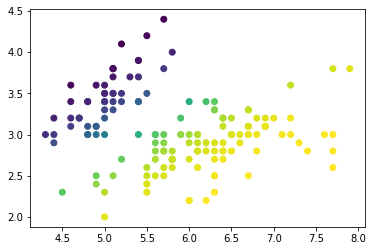

In [64]:
Z = np.dot(wagi, np.transpose(x)) + bias
prawdopodobienstwa_klas = sigmoid(Z)


plt.scatter(x[:,0],x[:,1], c = prawdopodobienstwa_klas)

## Predykcja

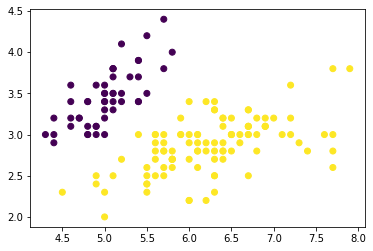

In [65]:
predykcja = []
for i in range(0,len(prawdopodobienstwa_klas)):
    if prawdopodobienstwa_klas[i] > 0.5:
        predykcja.append(1)
    else:
        predykcja.append(0)
        
plt.scatter(x[:,0],x[:,1], c = predykcja)

## Prawdziwe labele

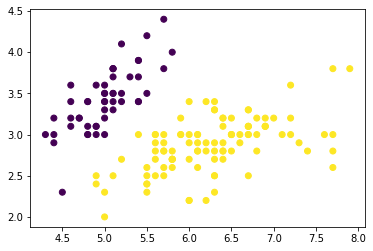

In [66]:
plt.scatter(x[:,0],x[:,1], c = y)